In [1]:
# import numpy as np

# # !/usr/bin/env python3
# # -*- coding: utf-8 -*-
# """
# Created on 20181219

# @author: zhangji

# Trajection of a ellipse, Jeffery equation. 
# """

# %pylab inline
# pylab.rcParams['figure.figsize'] = (25, 11)
# fontsize = 40

# import numpy as np
# import scipy as sp
# from scipy.optimize import leastsq, curve_fit
# from scipy import interpolate
# from scipy.interpolate import interp1d
# from scipy.io import loadmat, savemat
# # import scipy.misc

# import matplotlib
# from matplotlib import pyplot as plt
# from matplotlib import animation, rc
# import matplotlib.ticker as mtick
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
# from mpl_toolkits.mplot3d import Axes3D, axes3d

# from sympy import symbols, simplify, series, exp
# from sympy.matrices import Matrix
# from sympy.solvers import solve

# from IPython.display import display, HTML
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
# import pandas as pd
# import re
# from scanf import scanf
# import os
# import glob

# from codeStore import support_fun as spf
# from src.support_class import *
# from src import stokes_flow as sf

# rc('animation', html='html5')
# PWD = os.getcwd()
# font = {'size': 20}
# matplotlib.rc('font', **font)
# np.set_printoptions(linewidth=90, precision=5)

import os
import glob
import natsort 
import numpy as np
import scipy as sp
from scipy.optimize import leastsq, curve_fit
from scipy import interpolate, integrate
from scipy import spatial, signal
# from scipy.interpolate import interp1d
from scipy.io import loadmat, savemat
# import scipy.misc
import importlib
from IPython.display import display, HTML
import pandas as pd
import pickle
import re
from scanf import scanf

import matplotlib
# matplotlib.use('agg')
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib import animation, rc
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.mplot3d import Axes3D, axes3d
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib import cm

from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
from time import time
from src.support_class import *
from src import jeffery_model as jm
from codeStore import support_fun as spf
from codeStore import support_fun_table as spf_tb

# %matplotlib notebook
%matplotlib inline
rc('animation', html='html5')
fontsize = 40
PWD = os.getcwd()

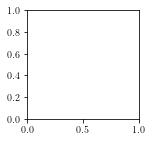

In [2]:
fig = plt.figure(figsize=(2, 2))
fig.patch.set_facecolor('white')
ax0 = fig.add_subplot(1, 1, 1)

In [6]:
job_dir = 'ecoliB01_a'
table_name = 'planeShearRatex_1d'

In [8]:
# show phase map of theta-phi, load date
importlib.reload(spf_tb)

t_headle = '(.*?).pickle'
t_path = os.listdir(os.path.join(PWD, job_dir))
filename_list = [filename for filename in os.listdir(os.path.join(PWD, job_dir)) 
                 if re.match(t_headle, filename) is not None]

for tname in tqdm_notebook(filename_list[:]):
    tpath = os.path.join(PWD, job_dir, tname)
    with open(tpath, 'rb') as handle:
        tpick = pickle.load(handle)
    Table_t = tpick['Table_t']
    if 'Table_dt' not in tpick.keys():
        Table_dt = np.hstack((np.diff(tpick['Table_t']), 0))
    else:
        Table_dt = tpick['Table_dt']
    Table_X = tpick['Table_X']
    Table_P = tpick['Table_P']
    Table_P2 = tpick['Table_P2']
    Table_theta = tpick['Table_theta']
    Table_phi = tpick['Table_phi']
    Table_psi = tpick['Table_psi']
    Table_eta = tpick['Table_eta']
    
    save_name = '%s.jpg' % (os.path.splitext(os.path.basename(tname))[0])
    idx = Table_t > 0
    fig = spf_tb.save_table_result(os.path.join(PWD, job_dir, save_name), 
                                Table_t[idx], Table_dt[idx], Table_X[idx], Table_P[idx], Table_P2[idx], 
                                Table_theta[idx], Table_phi[idx], Table_psi[idx], Table_eta[idx])
    plt.close(fig)

In [5]:
filename_list

['th1.503_ph0.000_ps0.000_D20190714_T225427.pickle',
 'th0.546_ph5.214_ps0.000_D20190715_T040610.pickle',
 'th0.683_ph1.337_ps0.000_D20190715_T011428.pickle',
 'th2.595_ph5.481_ps0.000_D20190715_T043702.pickle',
 'th2.459_ph3.877_ps0.000_D20190715_T032737.pickle',
 'th0.546_ph1.337_ps0.000_D20190715_T011429.pickle',
 'th2.732_ph5.214_ps0.000_D20190715_T040610.pickle',
 'th2.185_ph4.412_ps0.000_D20190715_T035349.pickle',
 'th1.093_ph2.807_ps0.000_D20190715_T023653.pickle',
 'th2.732_ph1.203_ps0.000_D20190715_T011130.pickle',
 'th0.137_ph3.342_ps0.000_D20190715_T031151.pickle',
 'th1.366_ph6.016_ps0.000_D20190715_T045021.pickle',
 'th2.868_ph0.936_ps0.000_D20190715_T005118.pickle',
 'th1.366_ph2.005_ps0.000_D20190715_T020546.pickle',
 'th1.366_ph2.406_ps0.000_D20190715_T021007.pickle',
 'th1.229_ph0.668_ps0.000_D20190715_T005119.pickle',
 'th1.229_ph5.882_ps0.000_D20190715_T044438.pickle',
 'th0.410_ph5.347_ps0.000_D20190715_T042035.pickle',
 'th2.595_ph3.075_ps0.000_D20190715_T024550.pi